# Assignment 6: Knock airport Weather

Approach:
- Read in the data set from csv
- Plot the temperature
- Plot the mean temperature each day
- Plot the mean temperature for each month

Note: since this data set stretches over 28 years, I will just be taking samples of the dataset for each subtask.

In [31]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read in data
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
df.head()


/var/folders/p8/t9htpdzd0tb8fvlql0glv1qr0000gn/T/ipykernel_83864/238112292.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


## Plot Temperature

/var/folders/p8/t9htpdzd0tb8fvlql0glv1qr0000gn/T/ipykernel_83864/1620596486.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timestamp = pd.to_datetime(df['date'])
/var/folders/p8/t9htpdzd0tb8fvlql0glv1qr0000gn/T/ipykernel_83864/1620596486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = timestamp[filtered_df.index].dt.year


Text(0, 0.5, 'Temperature (Celcius)')

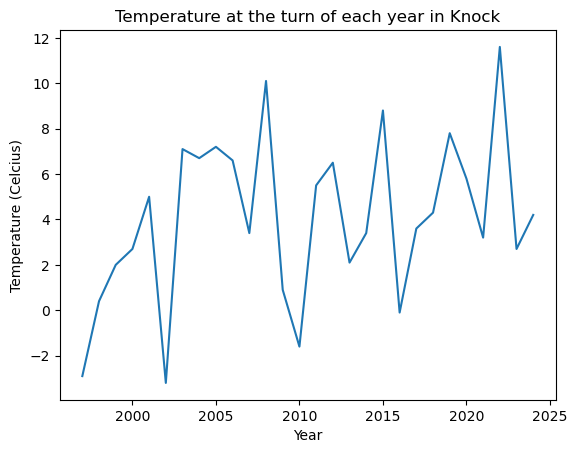

In [32]:
# For this task, I will take the temperature from 1 January each year at midnight.

# First making sure the timestamps are correctly in date-time format to be able to easily manipulate them.
timestamp = pd.to_datetime(df['date'])

# Filter the DataFrame for January 1st at midnight each year
filtered_df = df[(timestamp.dt.month == 1) & 
                 (timestamp.dt.day == 1) & 
                 (timestamp.dt.hour == 0) & 
                 (timestamp.dt.minute == 0) & 
                 (timestamp.dt.second == 0)]

# Add a 'year' column to the filtered DataFrame
filtered_df['year'] = timestamp[filtered_df.index].dt.year

# Plot the temperature against the extracted year
sns.lineplot(x=filtered_df['year'], y=filtered_df['temp'])

plt.title("Temperature at the turn of each year in Knock")
plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")



## Mean temperature each day of the month
For this, I will use the month I was born (February 1998).